# Stochastic Gradient Descent

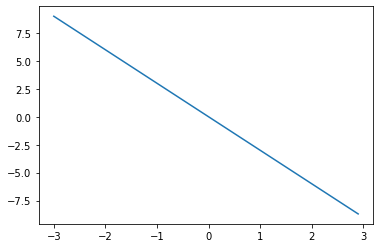

In [1]:
import torch
import matplotlib.pyplot as plt

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

x = torch.arange(-3, 3, 0.1).view(-1, 1)

f = -3 * x

plt.plot(x.numpy(), f.numpy())
plt.show()


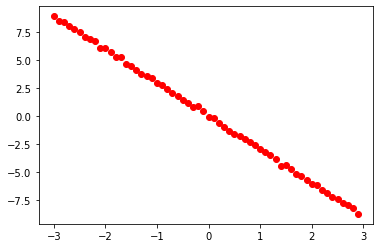

In [2]:
y = f + 0.1 * torch.randn(x.size())
plt.plot(x.numpy(), y.numpy(), 'ro')
plt.show()

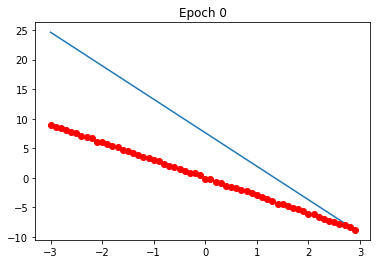

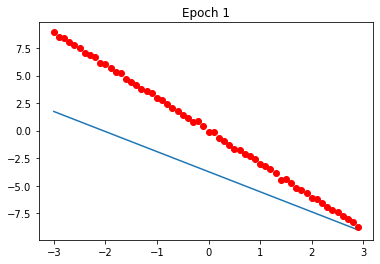

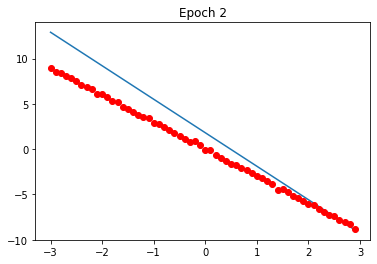

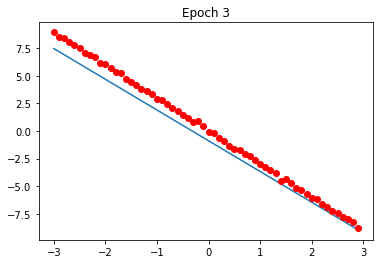

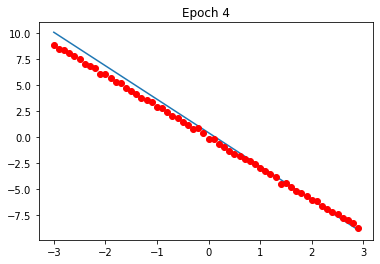

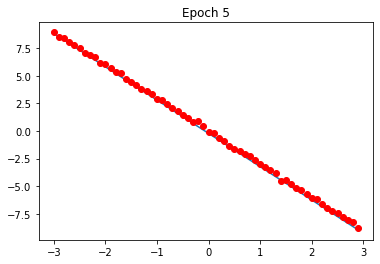

[Epoch 0] Total loss: 2509 
[Epoch 1] Total loss: 844 
[Epoch 2] Total loss: 191 
[Epoch 3] Total loss: 51 
[Epoch 4] Total loss: 10 
[Epoch 5] Total loss: 4 


In [3]:
def forward(x):
    y = w * x + b
    return y

# Cost function
def criterion(yhat, y):
    return torch.mean((yhat-y) ** 2)

lr = 0.1

COST = []

for epoch in range(6):
    total = 0
    
    for _x, _y in zip(x, y):
        _yhat = forward(_x)
        loss = criterion(_yhat, _y)
        loss.backward()
        
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        total += loss.item()
    
    COST.append(total)
    
    yhat = forward(x)
        
    plt.title('Epoch %d' % epoch)
    plt.plot(x.numpy(), yhat.detach().numpy())
    plt.plot(x.numpy(), y.view(-1, 1).numpy(), 'ro')
    plt.show()

for ind, c in enumerate(COST):
    print('[Epoch %d] Total loss: %d ' % (ind, c));

## SGD using Dataloader

In [4]:
from torch.utils.data import Dataset, DataLoader

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

class Data(Dataset):
    def __init__(self):  
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3 * x + 1 + 0.1 * torch.randn(self.x.shape[0])
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

dataset = Data()
print(len(dataset))
_x, _y = dataset[0]
print(_x, _y)

60
tensor([-3.]) tensor([ 9.9358,  9.9682, 10.1396, 10.1394,  9.8922,  9.8734,  9.9295,  9.9267,
         9.8707,  9.9173,  9.9785,  9.9347, 10.1941, 10.2059,  9.8172,  9.9625,
         9.8656,  9.9910, 10.2866,  9.9889, 10.0120,  9.9299, 10.0602, 10.0070,
        10.1329,  9.9076, 10.1863, 10.0850,  9.9139,  9.9462, 10.0963,  9.8660,
        10.0694, 10.0079,  9.8348,  9.9755, 10.0536, 10.0202, 10.0563,  9.9338,
        10.0577, 10.1502,  9.9026,  9.9389, 10.0015, 10.1080,  9.9078, 10.0828,
         9.8066,  9.8904,  9.9531, 10.2594,  9.8625,  9.9347, 10.0539,  9.9699,
         9.8602, 10.0923,  9.9780,  9.9518])


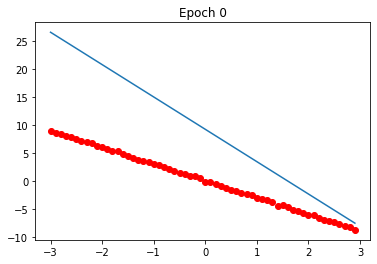

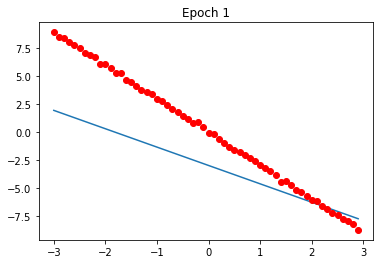

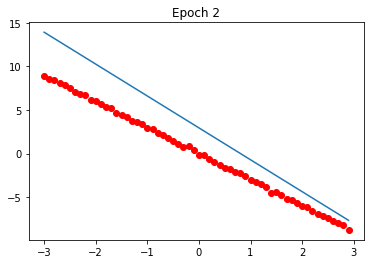

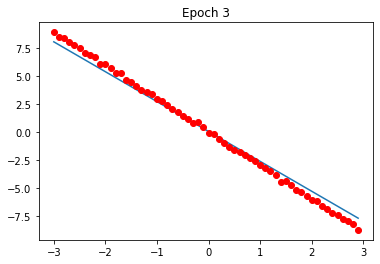

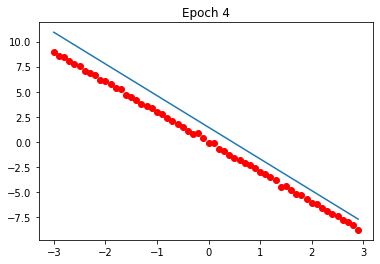

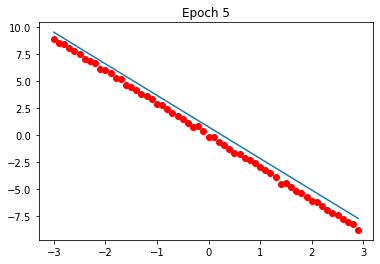

[Epoch 0] Total loss: 2409 
[Epoch 1] Total loss: 956 
[Epoch 2] Total loss: 228 
[Epoch 3] Total loss: 54 
[Epoch 4] Total loss: 13 
[Epoch 5] Total loss: 3 


In [5]:
train_loader = DataLoader(dataset=dataset, batch_size=1)

COST = []

for epoch in range(6):
    total = 0

    for _x, _y in train_loader:
        _yhat = forward(_x)
        loss = criterion(_yhat, _y)
        loss.backward()

        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data

        w.grad.data.zero_()
        b.grad.data.zero_()

        total += loss.item()
    
    COST.append(total)
    
    yhat = forward(x)
        
    plt.title('Epoch %d' % epoch)
    plt.plot(x.numpy(), yhat.detach().numpy())
    plt.plot(x.numpy(), y.view(-1, 1).numpy(), 'ro')
    plt.show()

for ind, c in enumerate(COST):
    print('[Epoch %d] Total loss: %d ' % (ind, c));


## Mini-Batch Gradient Descent

Use a few samples at a time

Assume that we have 6 sample

A B C D E F

If batch size = 2

Take 2 samples at a time as input, that is

Epoch1

    Iteration 1 A B
    Iteration 2 C D
    Iteration 3 E F

* $Iterations = \frac{training\ size}{batch\ size}$

In [6]:
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=5)

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

lr = 0.1

LOSS_5 = []

for epoch in range(6):
    for _x, _y in trainloader:
        _yhat = forward(_x)
        loss = criterion(_yhat, _y)
        loss.backward()
        
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        LOSS_5.append(loss.item())

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
        
LOSS_20 = []

trainloader = DataLoader(dataset=dataset, batch_size=20)
for epoch in range(6):
    for _x, _y in trainloader:
        _yhat = forward(_x)
        loss = criterion(_yhat, _y)
        loss.backward()
        
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        LOSS_20.append(loss.item())
        

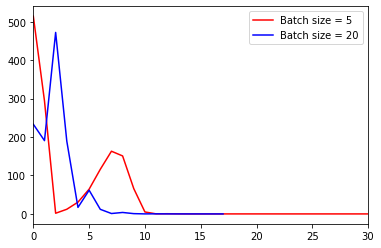

In [7]:
plt.plot(LOSS_5, color='red', label='Batch size = 5')
plt.plot(LOSS_20, color='blue', label='Batch size = 20')
plt.xlim(0, 30)
plt.legend()
plt.show()